<br>
<br>
<br>
<br>
<br>
<h1><center>Project 2</center></h1>
<br>
<h3><center>Harvey Hauw</center></h3>
<br>
<h3><center>7 September 2016</center></h3>
<br>
<br>
<br>
<br>
<br>

### Part A:
<p>
In the first part of this project, we were to solve linear system of equations $Ax=b$, where $x$ - unknow vector values, $A$ - Vandermonde matrix and $b$ - known result right hand side vector. The algorithm generation for Vandermonde matrix defined in the project guide. Aswell this part of project require work with matrix algebra. Before we start to test this linear solver method we must implement matrix generation algorithm from textbook.
</p>

#### C++ code snipet for Vandermonde matrix generation:

This method accept vector $v$ wich we can generate using Linspace method from matrix class before call $createVandermonde$

#### Vector creation snipet:

#### Prepare solver:

We still cant use solver from matrix class - not enought elements. So next step is generate test vector $x$ (known data) and calculate right hand side $b$ vector from equation $Ax=b$.

Now we can use Solver.

#### Test Solver:

After call $Solve$ we calculate 2-norm of error and residula vectors. 

#### Print error, residula norm to the console:

After all calculations we save data to the files for next step - analyze with python.

Load data and plot $error$ vector respect to $N$ (size of Vandermonde matrix)

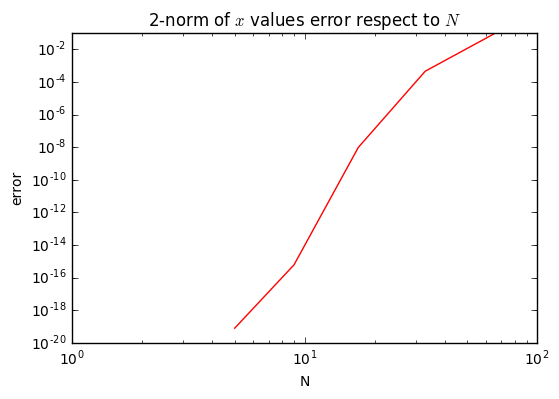

In [1]:
from pylab import *
%matplotlib inline
N = loadtxt('N.txt')
error = loadtxt('error.txt')
figure()
loglog(N, error, 'r')
xlabel('N')
ylabel('error')
title('2-norm of $x$ values error respect to $N$')
show()

Now load data and plot $residula$ vector with values for each $N$

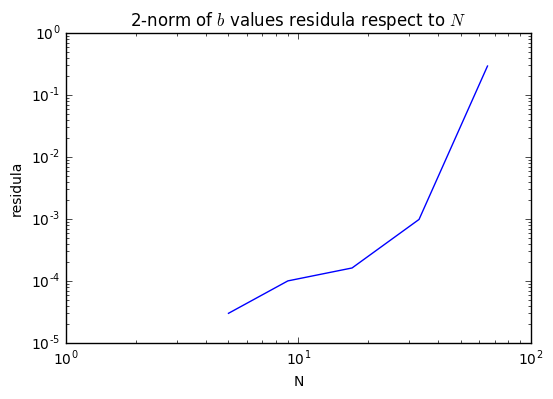

In [2]:
from pylab import *
%matplotlib inline
N = loadtxt('N.txt')
residula = loadtxt('residula.txt')
figure()
loglog(N, residula, 'b')
xlabel('N')
ylabel('residula')
title('2-norm of $b$ values residula respect to $N$')
show()

As we can see both vectors: $error$ and $residula$ continue to rise when $N$ values increase.
Answer for this its float point error that rise with number of operations. 

### Part B:
<p>
    In the second part of this project, we were to implement Newton nonlinear solver for root finding problem.
    The Newton solver method algorithm theory defined in the project guide. Also we want to understand what changes when tolerance or initial guess $x0$ varry. <br/>
    Function for this problem: $f(x)=x^{2}(x-3)(x+2)$,<br/>
    set of tolerance: ${10^{-1}, 10^{-5}, 10^{-9}}$<br/>
    set of $x0$: ${ -3, 1, 2 }$
</p>

We will produce callculation for each tolerance and $x0$ from both initial data sets.

#### C++ implementation of Newton solver:

#### Test Newton method:

As u can see we save initial x, tolerance and result x triplets to the output file "newton_result.txt". This data will be used later in python.

#### Now we can analyze results with python pylab:

Load data $initial_x$ point, $tolerance$, result $x$ values and plot $f(x)$, $tangent-line$, $x0$. For each triplet we will produce separate images

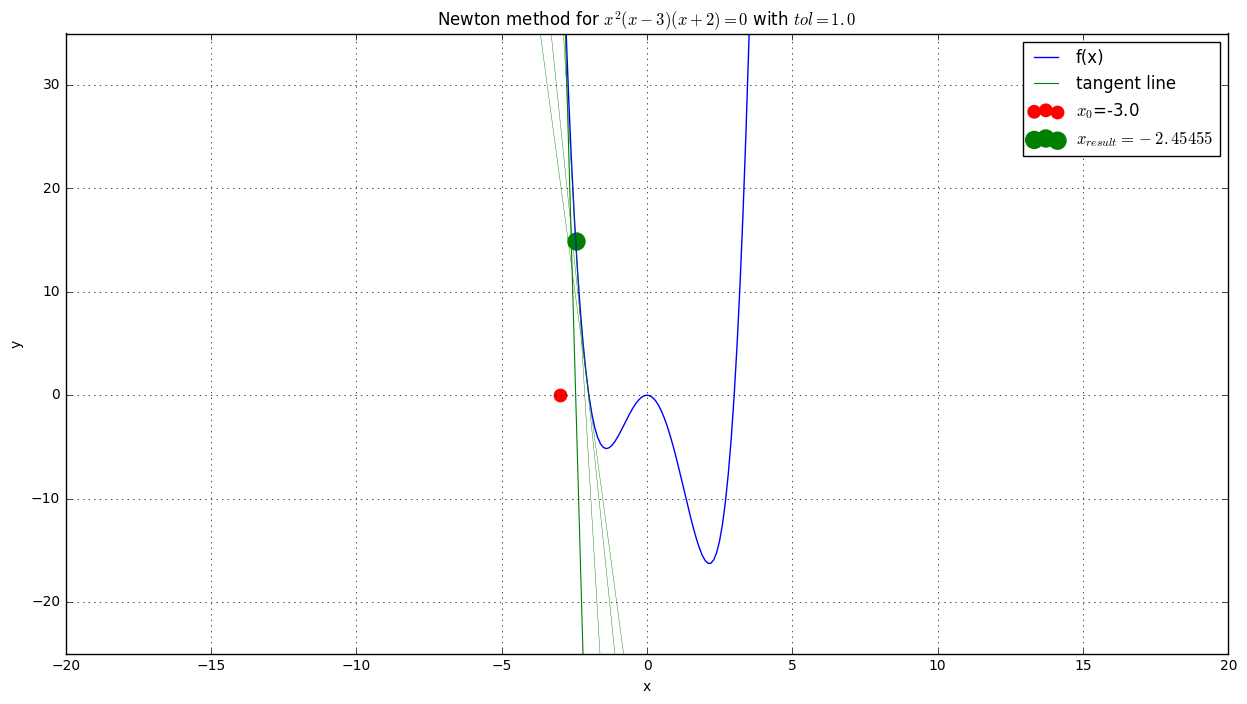

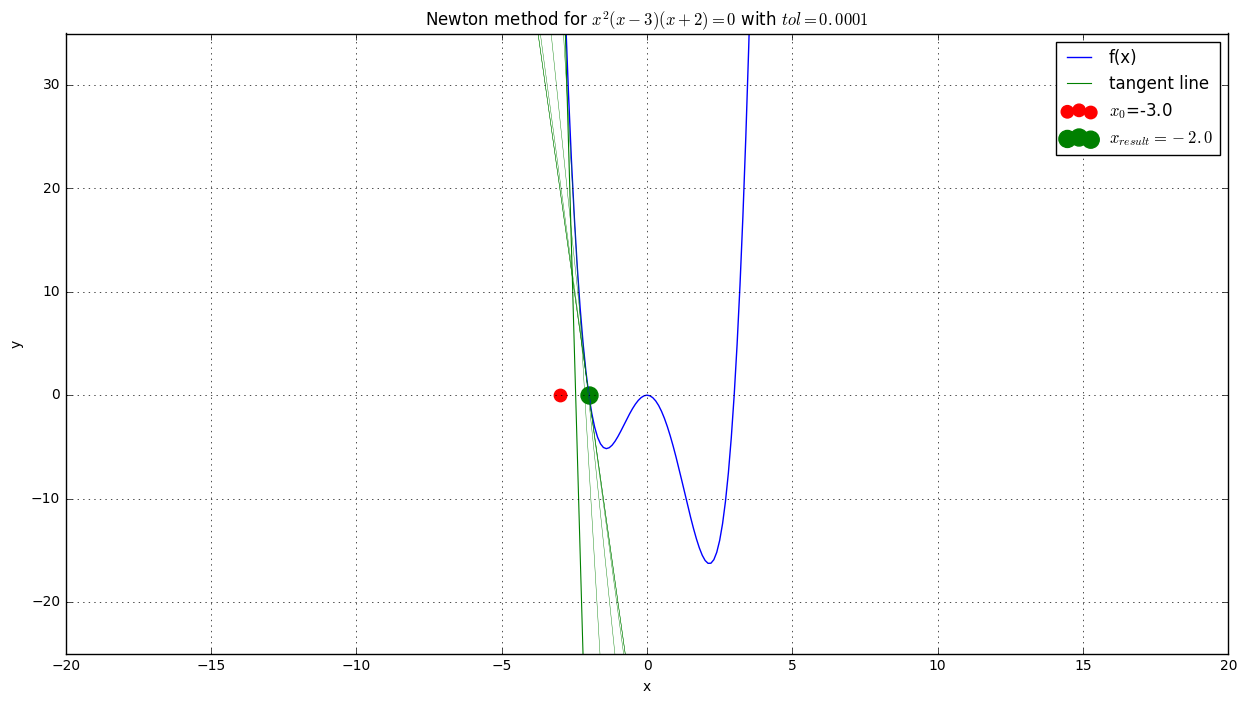

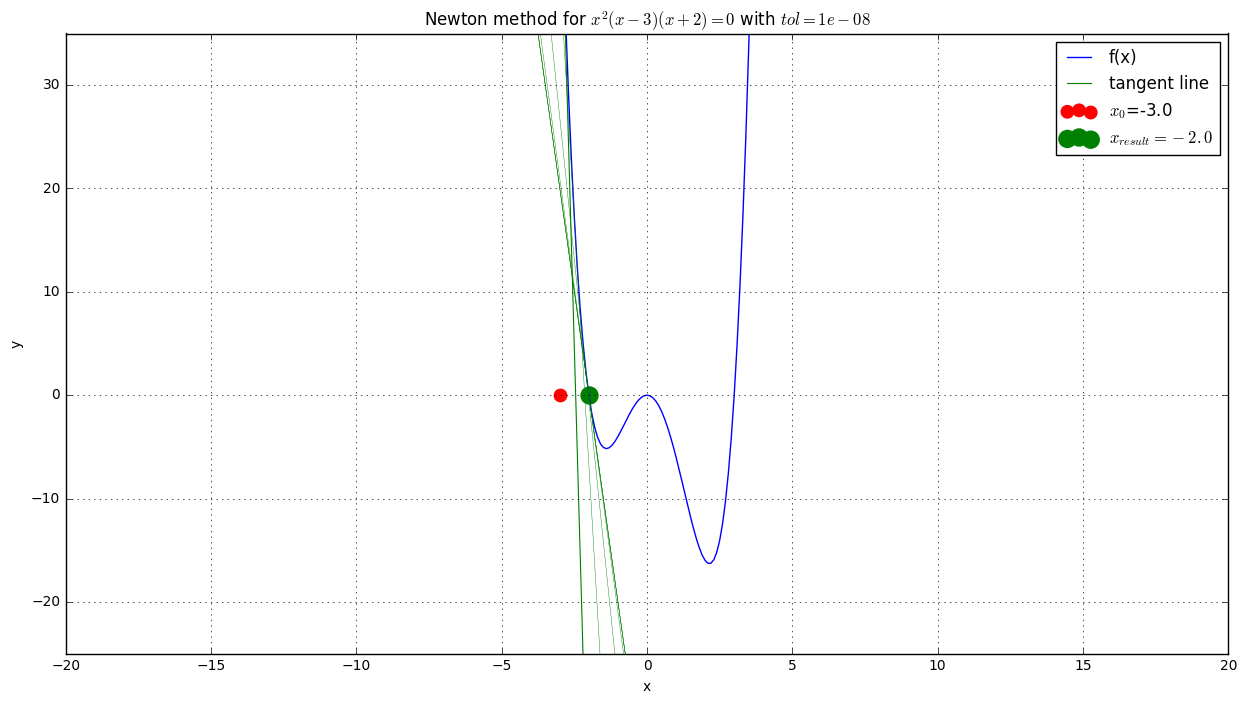

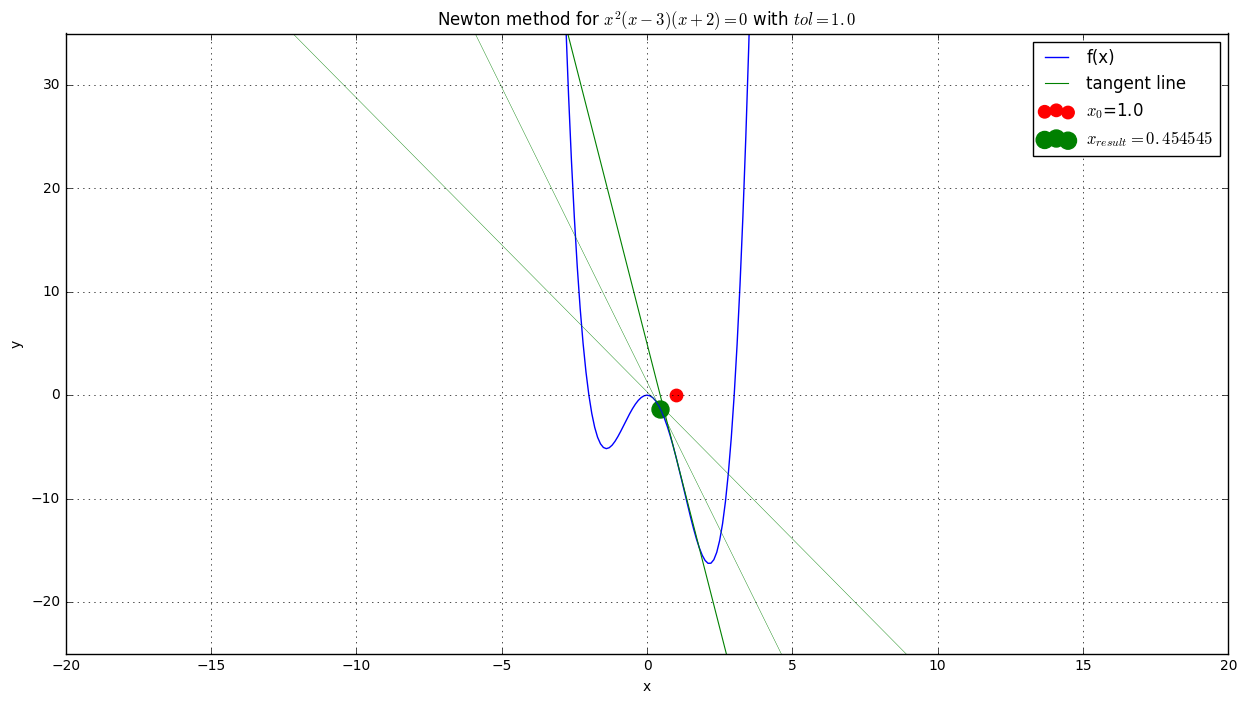

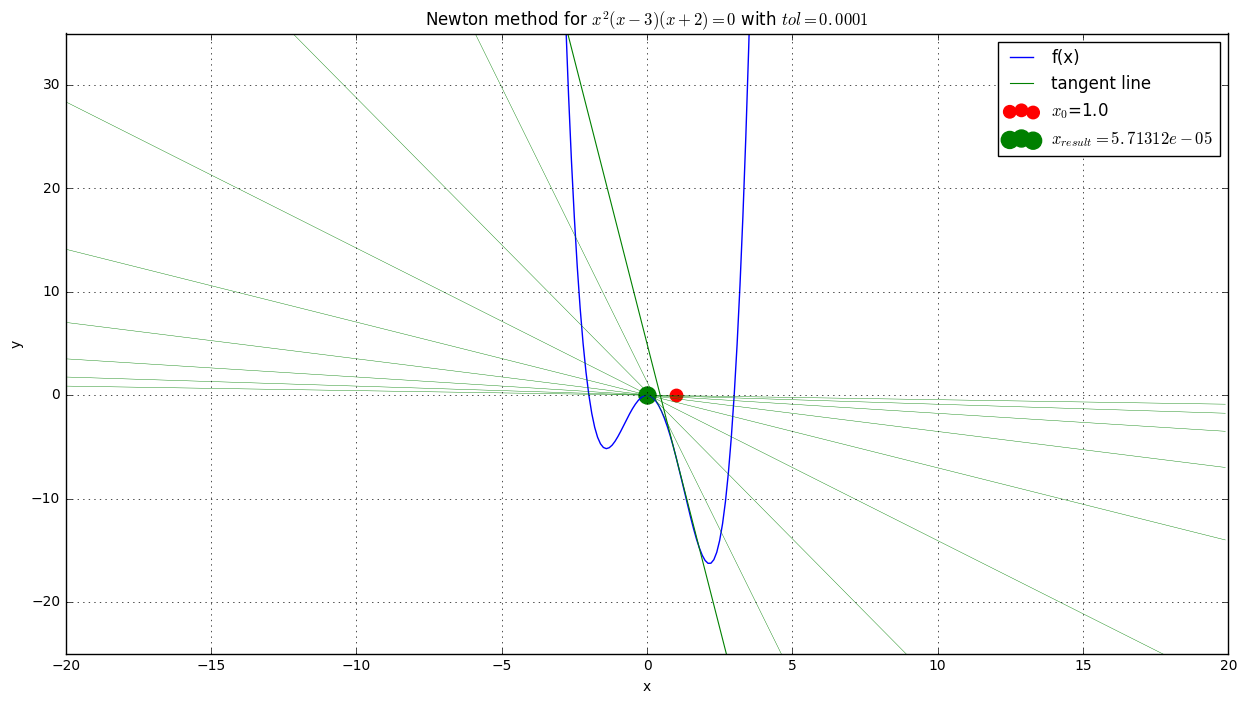

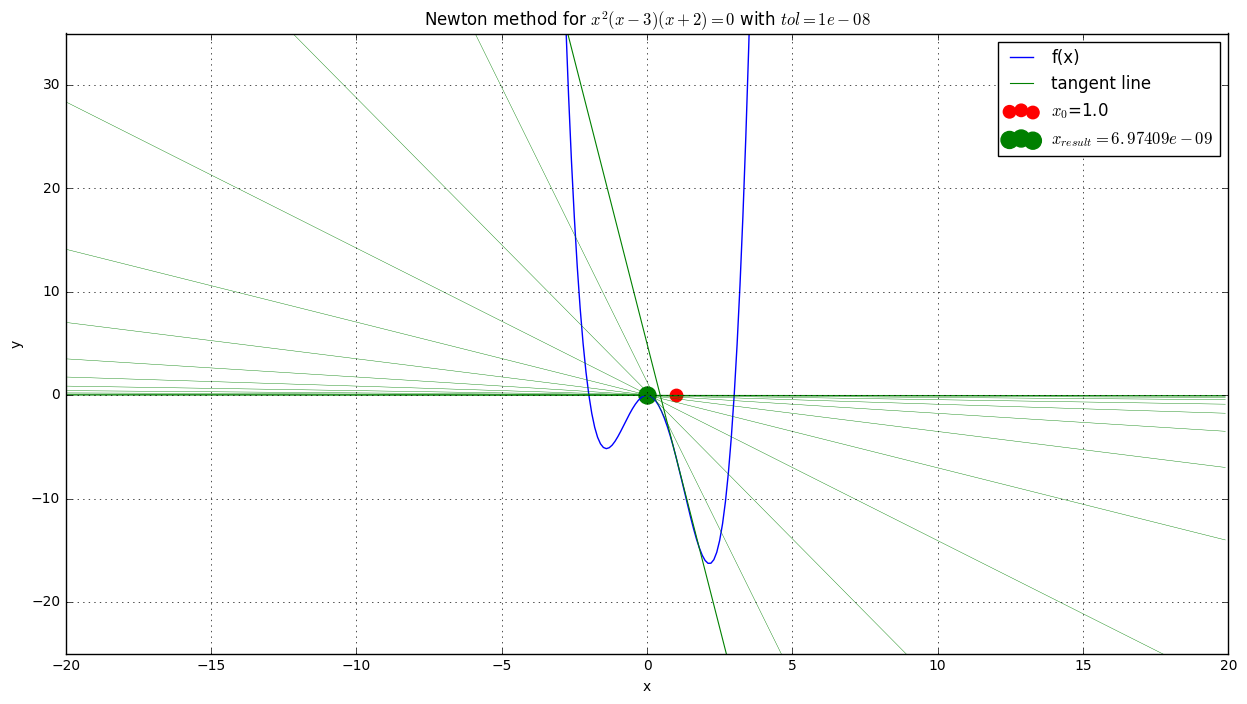

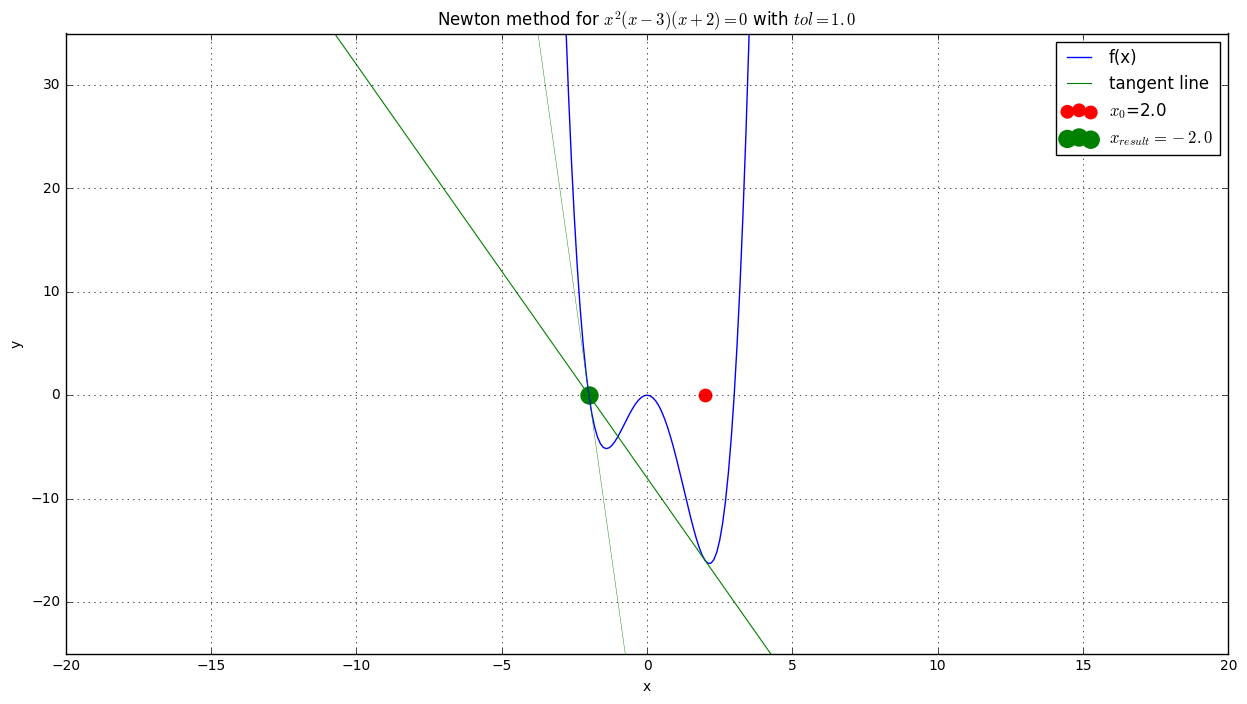

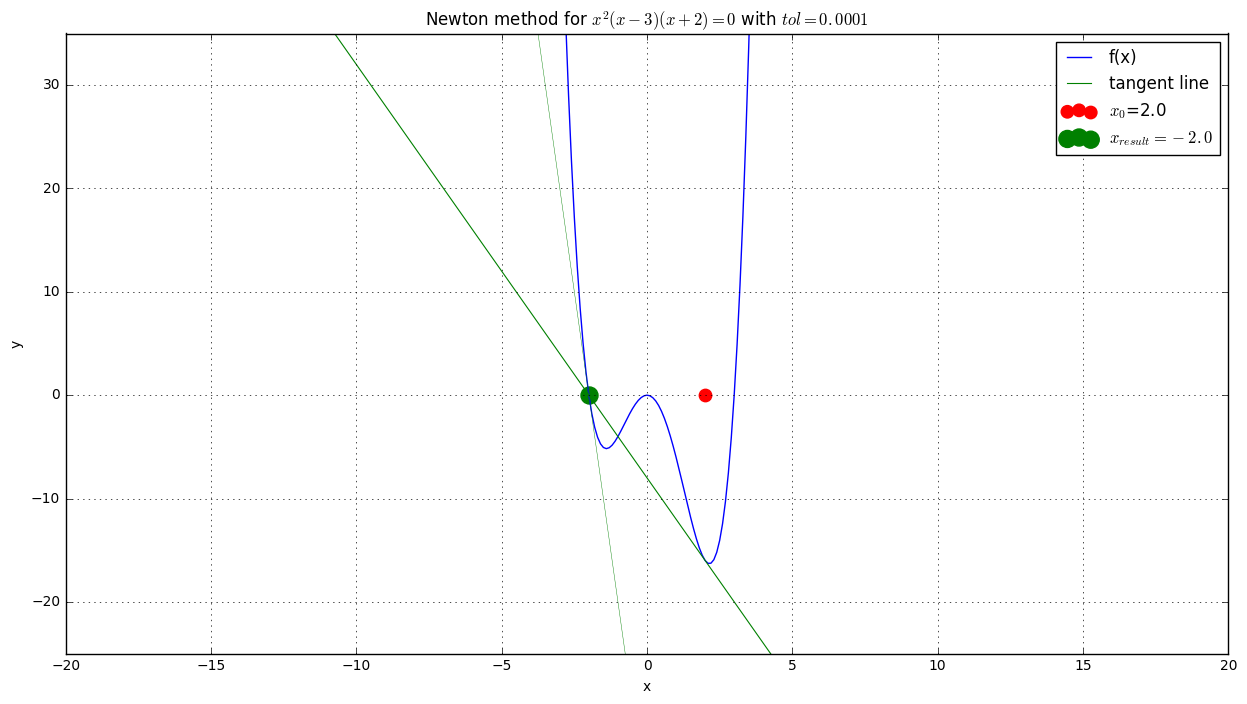

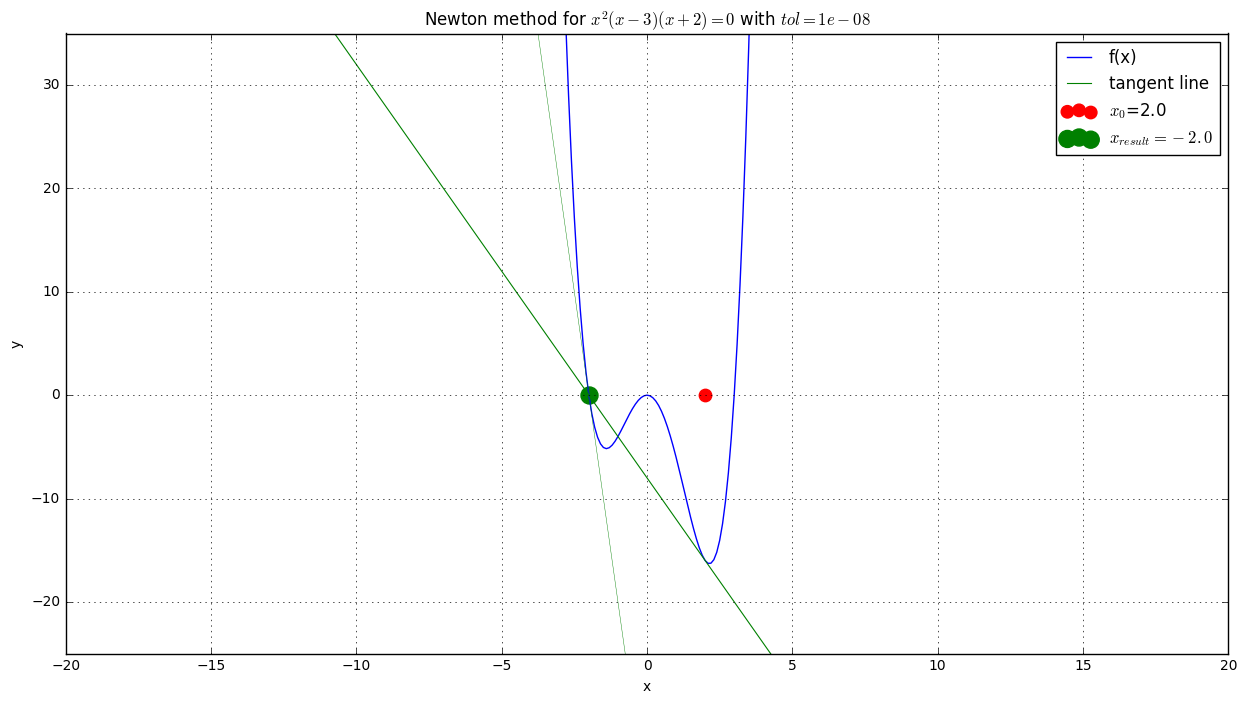

In [4]:
from pylab import *
import numpy
%matplotlib inline

def f(x):
    return x**2 * (x - 3) * (x + 2)

def df(x):
    return 4 * x ** 3 - 3 * x ** 2 - 12 * x;

def tangent(x, x0):
    return f(x0) + df(x0) * (x - x0)

def dx(f, x):
    return abs(0-f(x))

def draw_func( x0, tol, x_res, f, df, min_x=-20, max_x=20, step_x=0.1, min_y=-25, max_y=35 ):  
    x = np.arange(min_x, max_x, step_x)
    y = map(f, x)
    plt.figure(figsize=(15,8))
    # set up min/max values
    plt.ylim([min_y, max_y])
    plt.xlim([min_x, max_x])
    # shop grid on the graph
    plt.grid(True)
    # plot f(x)
    plt.plot(x, y)
    # plot initial x value
    plt.scatter(x0, 0, color='red', s=80)
    # plot result x value obtained by C++ program
    plt.scatter( np.array([x_res]), np.array([f(x_res)]), color='green', s=150)
    # plot tangent line at x0
    tang = [tangent(xi, x0) for xi in x]
    xk = x0
    plt.plot(x, tang, color='green', linewidth=0.8)
    # show legend
    plt.legend(['f(x)', 'tangent line', '$x_0$=' + str(x0), '$x_{result}=' + str(x_res) + '$'])
    ########################################################
    # calculate 'x' using Newton method and plot tangent line for each xk value    
    delta = dx(f, x0)
    while delta > tol:
        xk = xk - f(xk) / df(xk)
        delta = dx(f, xk)
        tang = [tangent(xi, xk) for xi in x]
        plt.plot(x, tang, color='green', linewidth=0.3)    
    ########################################################    
    plt.ylabel('y')
    plt.xlabel('x')  
    plt.title('Newton method for $x^{2}(x-3)(x+2)=0$ with $tol=' + str(tol) + '$')
    plt.show()

# Load x0, tolerance, x result triplets from file
newton_result = loadtxt('newton_result.txt')
# Iterate these data and draw pictures
for (xi, tol, x_res) in newton_result:
    draw_func(xi, tol, x_res, f, df)

As we can see the upper bound $R$ is decreasing with the increasing value of $n$.  Value of relative error $r$ is decreasing at the beginning and reaching it's mininum about $n=27$ but later it starts increasing. And after $n=27$ both upper bound $R$ and relative errors $r$ is increasing with the increasing value of $n$. When both values decreasing they moves nearly, but when they  increase - only upper bound $R$ values go almost linear, relative error $r$ looks as piecewise function.
Now load data and plot  $f(h,r)$, $f(h,R)$

#### Initial value $x_0$
Initial value is important, because the result will depend on that to what direction the method will move. 
We can observe direction of convergence (using tangent lines) depends on initial $x0$. Using this info we can predict witch value will be return as result from Newton method.

#### Tolerance
What about tolerance ? Yes this is important thing aswell. Look at the pic #3, #6, #9. On these pictures value from tolerance set is min. Tolerance give us more precisely value of result $x$, but we must pay for accuracy - larger number of iterations.

### Part C:
<p>
    In the third part of this project, we were to evaluate position with respect to time of an object on a eliptic orbit using Kepler motion equation $\epsilon sin(\omega) - \omega=t$. To solve this equation for $\omega$ we will use Newton solver that we implement in part B. All theory about eliptic orbital motion defined in the project guide.
</p>

First of all we must determine nonlinear root-finding residual function $f(\omega)$ that we can use to solve Kepler equation. Aswell we need $f'(\omega)$ for Newton solver.

$f(w)=\epsilon sin(\omega) - \omega - t$

$f'(w)=\frac{d}{d \omega}f(w)=\epsilon cos(\omega) - 1$

#### C++ code snipet:

When we find $f(w)$ and $f'(w)$ we can start solve this problem. First of all we must set up initial values.

#### C++ code snipet (initial values):

Next generate time vector $t$, and empty $x(t)$, $y(t)$ vectors.

#### Preparation done, time to calculate position with respect to time:

And save $t$, $x(t)$, $y(t)$ vectors to the output files.

#### Lets plot these values with python pylab:

Load data and plot $t$, $x$, $y$

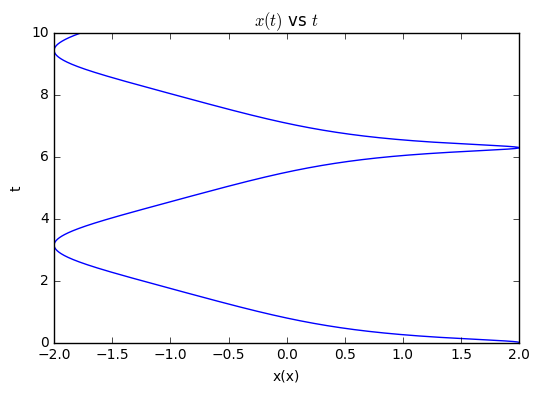

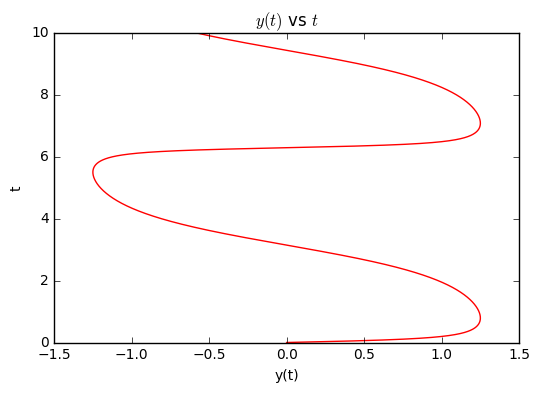

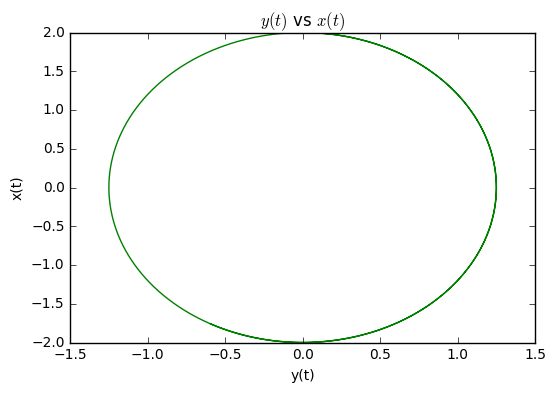

In [5]:
from pylab import *
%matplotlib inline

t = loadtxt('t.txt')
x = loadtxt('x.txt')
y = loadtxt('y.txt')
# Draw x(t) vs t 
figure()
plot(x, t, 'b')
xlabel('x(x)')
ylabel('t')
title('$x(t)$ vs $t$')
# Draw y(t) vs t 
figure()
plot(y, t, 'r')
xlabel('y(t)')
ylabel('t')
title('$y(t)$ vs $t$')
# Draw y(t) vs x(t)
figure()
plot(y, x, 'g')
xlabel('y(t)')
ylabel('x(t)')
title('$y(t)$ vs $x(t)$')

At the last picture we can observe eliptic orbit.